In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import time
from scipy.special import lambertw
import matplotlib as mpl


from noise_distribution import sample_laplace_radius, sample_staircase_radius_one


In [2]:

# --- set global font to Times New Roman ---
# ---- Camera-ready settings (avoid Type-3 fonts) ----
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'


In [3]:
def generate_plm_samples(epsilon, num_samples):
    
    samples = [sample_laplace_radius(epsilon) for _ in range (num_samples)]
    
    return samples

def generate_psm_samples(epsilon, num_samples):
    samples = sample_staircase_radius_one(epsilon, delta=1.0, L=None, size=num_samples)
    return samples    

In [4]:
# Parameters
epsilon = 0.1 # Privacy parameter
num_samples = 100000    # Number of r values to generate

# Generate r values
rs = generate_psm_samples(epsilon, num_samples)
# Generate r values
rl = generate_plm_samples(epsilon, num_samples)


# Print summary statistics
print("Laplace: mean = {:.3f}, max = {:.3f}, sum = {:.3f}".format(np.array(rl).mean(), np.array(rl).max(), np.array(rl).sum()))
print("Staircase: mean = {:.3f}, max = {:.3f}, sum = {:.3f}".format(np.array(rs).mean(), np.array(rs).max(), np.array(rs).sum()))

Laplace: mean = 19.960, max = 137.832, sum = 1996027.459
Staircase: mean = 10.031, max = 112.913, sum = 1003111.850


In [6]:
# rl_array = np.array(rl).reshape(-1, 1)  # Reshape to 2D array for sklearn

# # Fit Kernel Density Estimation
# kde = KernelDensity(kernel='gaussian', bandwidth=2)
# kde.fit(rl_array)

# # If you want to evaluate the density at specific points:
# x_l = np.linspace(0, max(rl), 1000).reshape(-1, 1)
# log_density = kde.score_samples(x_l)
# pdf = np.exp(log_density)  # Convert log density to probability density


# plt.fill_between(x_l.flatten(), pdf, color='salmon', alpha=0.7)
# plt.tick_params(axis='both', which='major', labelsize=20)
# # Adjusting the x-axis and y-axis tick intervals and formatting
# #plt.xticks(np.arange(0, 155, 50))  # Set x ticks from 0 to 12 with a step of 1
# plt.xlabel('Distance (meters)', size = 20 )
# plt.ylabel('Density', size = 20)
# plt.show()

In [7]:
# rs_array = np.array(rs).reshape(-1, 1)  # Reshape to 2D array for sklearn

# # Fit Kernel Density Estimation
# kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
# kde.fit(rs_array)

# # If you want to evaluate the density at specific points:
# x_s = np.linspace(0, max(rs), 1000).reshape(-1, 1)
# log_density = kde.score_samples(x_s)
# pdf = np.exp(log_density)  # Convert log density to probability density


# plt.fill_between(x_s.flatten(), pdf, color='royalblue', alpha=1)
# plt.tick_params(axis='both', which='major', labelsize=20)
# # Adjusting the x-axis and y-axis tick intervals and formatting
# #plt.xticks(np.arange(0, 155, 50))  # Set x ticks from 0 to 12 with a step of 1
# plt.xlabel('Distance (meters)', size = 20 )
# plt.ylabel('Density', size = 20)
# plt.show()


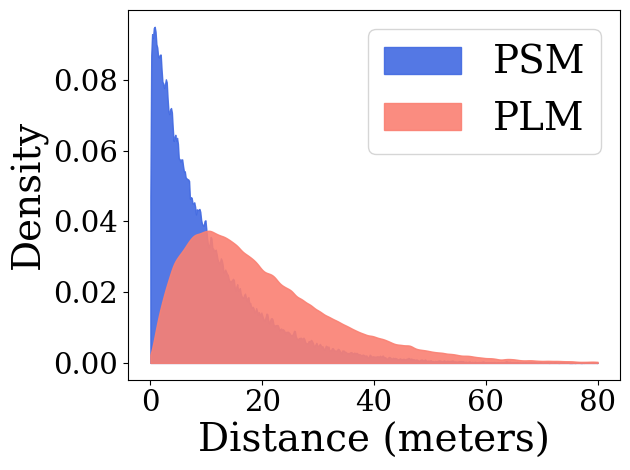

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# 📐 Font size settings
label_fontsize = 28
tick_fontsize = 21
legend_fontsize = 28
title_fontsize = 22

# Your data
rs_array = np.array(rs).reshape(-1, 1)
rl_array = np.array(rl).reshape(-1, 1)

# Fit KDE models
kde_rs = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(rs_array)
kde_rl = KernelDensity(kernel='gaussian', bandwidth=0.6).fit(rl_array)

# Define a common x-axis range
x_min = min(rs_array.min(), rl_array.min())
x_max = max(rs_array.max(), rl_array.max())

# Create full x grid
x_vals_full = np.linspace(x_min, x_max, 1000).reshape(-1, 1)

# Evaluate densities
pdf_rs_full = np.exp(kde_rs.score_samples(x_vals_full))
pdf_rl_full = np.exp(kde_rl.score_samples(x_vals_full))

# Filter to x <= 60
x_cutoff = 80
mask = x_vals_full.flatten() <= x_cutoff
x_vals = x_vals_full.flatten()[mask]
pdf_rs = pdf_rs_full[mask]
pdf_rl = pdf_rl_full[mask]
#plt.figure(figsize=(10, 8))  # Increased height for clarity

# Plot both densities with fill
plt.fill_between(x_vals, pdf_rs, color='royalblue', alpha=0.9, label='PSM')
plt.fill_between(x_vals, pdf_rl, color='salmon', alpha=0.9, label='PLM')

plt.xlabel('Distance (meters)', fontsize=label_fontsize)
plt.ylabel('Density', fontsize=label_fontsize)
plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tight_layout()

# Save as both SVG and PDF
output_base = r'C:\Users\ss6365\Desktop\PrivAR_PSM_PSM_I\figures\psm_plm_pdf'
# #plt.savefig(output_base + '.svg', format='svg', transparent=True)
plt.savefig(output_base + '.pdf', format='pdf', transparent=True)

plt.show()


In [13]:
import time
import numpy as np

# Parameters
epsilon = 0.1
num_samples = 10000  # or 100000 if you want

# ---- PLM timing ----
start_plm = time.perf_counter()
rl = generate_plm_samples(epsilon, num_samples)
end_plm = time.perf_counter()

plm_total_time = end_plm - start_plm
plm_time_per_sample = plm_total_time / num_samples

# ---- PSM timing ----
start_psm = time.perf_counter()
rs = generate_psm_samples(epsilon, num_samples)
end_psm = time.perf_counter()

psm_total_time = end_psm - start_psm
psm_time_per_sample = psm_total_time / num_samples

# ---- Print results ----
print(f"PLM total time: {plm_total_time:.6f} seconds")
print(f"PLM time per sample: {plm_time_per_sample:.9f} seconds")

print(f"PSM total time: {psm_total_time:.6f} seconds")
print(f"PSM time per sample: {psm_time_per_sample:.9f} seconds")


PLM total time: 0.038217 seconds
PLM time per sample: 0.000003822 seconds
PSM total time: 0.000761 seconds
PSM time per sample: 0.000000076 seconds
